# Problema Práctico
En esta notebook practicaremos el algoritmo de Regresión Logística de Machine Learning Supervisado para clasificar el conjunto de datos MNIST.
Seguiremos estos pasos:
1.  Preparar los datos: Cargar y entender qué información tenemos.
2.  Entrenar un modelo: Enseñar al modelo a reconocer los números.
3.  Evaluar el modelo: Ver qué tan bien funciona.

El conjunto de datos MNIST contiene imágenes de dígitos escritos a mano, en particular 0, 1, 3, 4, 5, 6, 7, 8, 9.

## Metodología


### 1. Carga de Datos
Primero, cargaremos el conjunto de datos de dígitos. Este conjunto ya viene listo para usar con nuestra librería, así que no hay que buscarlo en ningún otro lado. Contiene muchas imágenes de números y también nos dice qué número es cada imagen.

In [ ]:
# Importamos las librerias necesarias

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
# Obtenemos el dataset
digitos = load_digits()
# Imprimimos
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

### 1.2 Descripción
Para entender mejor nuestro conjunto de datos, vamos a revisar algunas de sus características principales. Veremos cuántas imágenes tenemos, cuántos detalles hay en cada imagen y cuáles son todos los números que podemos clasificar.

In [ ]:
digitos.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

In [ ]:
# Número de instancias (registros)
num_instancias = digitos.data.shape[0]
print(f"Número de Instancias (registros): {num_instancias}")

# Número de atributos (características)
# Cada imagen es de 8x8, que se aplana a un vector de 64 atributos.
num_atributos = digitos.data.shape[1]
print(f"Número de Atributos (características por instancia): {num_atributos}")

# Información de clases
num_clases = len(digitos.target_names)
nombres_clases = ', '.join(map(str, digitos.target_names))
info_clases_str = f"{num_clases} clases (dígitos únicos): {nombres_clases}"
print(f"Información de Clases: {info_clases_str}")

Número de Instancias (registros): 1797
Número de Atributos (características por instancia): 64
Información de Clases: 10 clases (dígitos únicos): 0, 1, 2, 3, 4, 5, 6, 7, 8, 9



Una buena forma de entender los datos es viéndolos. A continuación, se muestran algunas de las imágenes de los dígitos para tener una idea de cómo se ven.

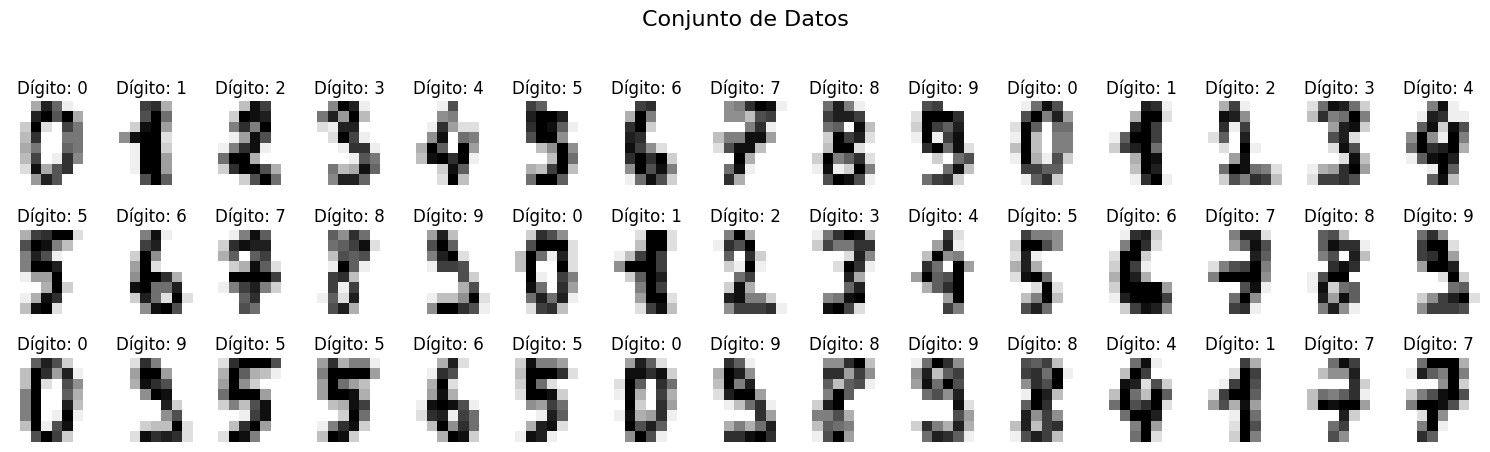

In [ ]:
# Descripción de conjunto de datos
fig, axes = plt.subplots(nrows=3, ncols = 15, figsize=(15, 5))
for ax, image, label in zip(axes.flatten(), digitos.images, digitos.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Dígito: {label}')
plt.suptitle('Conjunto de Datos', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 1.3 Entrenamiento y prueba



Ahora vamos a preparar nuestro modelo de clasificación. Primero, dividiremos los datos en dos partes: una para que el modelo aprenda, y otra para ver qué tan bien lo hace después de aprender. Se aconseja que el 70% sea para aprender, y el restante para probar el modelo.

In [ ]:
# Más librerias necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Instancia u objeto de nuestro modelo
modelo = LogisticRegression(max_iter=1000)
# Obtengo los datos de entrenamiento y los de prueba
xEnt, xTest, yEnt, yTest = train_test_split(digitos.data, digitos.target, test_size=0.30, random_state=0)
# Entrenamiento del modelo con los subconjuntos de datos, lo importante
modelo.fit(xEnt,yEnt)
# Probando el modelo
predicciones = modelo.predict(xTest)

## Evaluación del Modelo
Ahora que el modelo aprendió es importante saber qué tan bueno es. Por ejemplo su precisión y cómo se comporta al clasificar los números.


La precisión nos dice qué porcentaje de veces el modelo acertó al clasificar correctamente los números en los datos que usamos para la prueba.

In [ ]:
# ¿Qué tan preciso es el modelo?
precision = modelo.score(xTest,yTest)
print(f"La precisión del modelo es: {precision:.2%}")

La precisión del modelo es: 95.37%


Para ver más a fondo dónde se equivoca el modelo, usamos una matriz de confusión. Esta tabla nos muestra cuántas veces cada número fue predicho correctamente y cuántas veces se confundió con otro número.

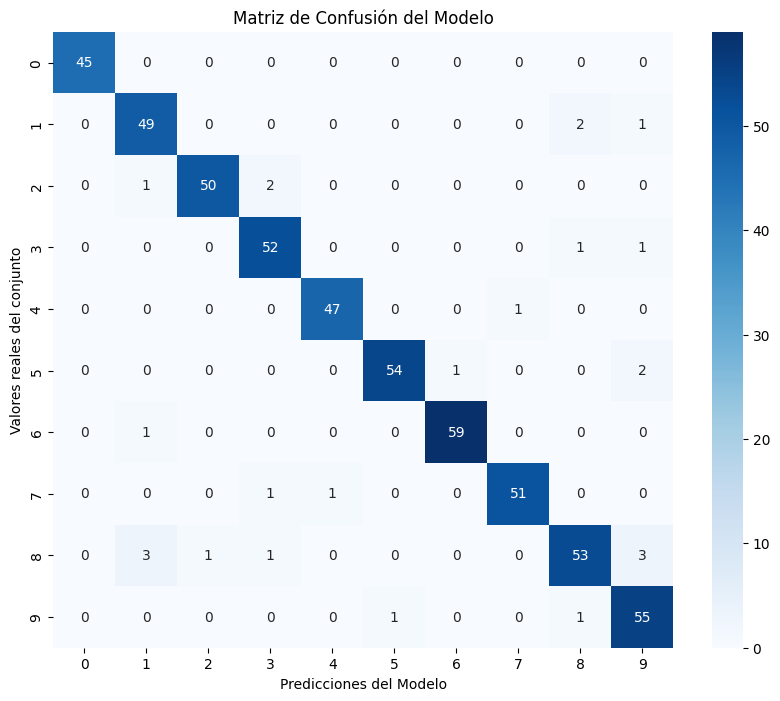

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Creamos la figura y los ejes con el tamaño deseado
plt.figure(figsize=(10, 8))


# Calculamos la matriz de confusión
matriz = confusion_matrix(yTest, predicciones)

# Visualizar en la matriz de confusión
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión del Modelo')
plt.xlabel('Predicciones del Modelo')
plt.ylabel('Valores reales del conjunto')
plt.show()

En la **diagonal principal** los números indican las predicciones correctas. Por ejemplo, la celda en la fila '0' y columna '0' nos dice cuántas veces el modelo predijo correctamente un '0' cuando el dígito real era un '0'. Cuanto mayores sean estos valores, mejor es el rendimiento del modelo.

Por otro lado, los **valores fuera de la diagonal principal** representan las predicciones incorrectas. Por ejemplo, la fila '3' y la columna '5', el valor ahí te dirá cuántas veces el modelo predijo un '5' cuando el dígito real era un '3'. Estos son los casos en los que el modelo se 'confundió'.


Al analizar esta matriz, podemos identificar qué dígitos son más difíciles de clasificar para el modelo y cuáles se confunden entre sí, lo que nos da una idea clara de las fortalezas y debilidades de nuestro algoritmo de regresión logística.